<a href="https://colab.research.google.com/github/rixprakash/DS2002F24/blob/main/finalprojectcode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
! git clone https://github.com/nw93929/DS2002FinalProject

fatal: destination path 'DS2002FinalProject' already exists and is not an empty directory.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
outcomes = pd.read_excel('/content/DS2002FinalProject/Data/WinningPartyByCounties.xlsx')
demographics2020 = pd.read_excel('/content/DS2002FinalProject/Data/demographicswingstates2020.xlsx')

In [82]:
outcomes['state'] = outcomes['state'].str.capitalize()
outcomes['county_name'] = outcomes['county_name'].str.capitalize()
outcomes['state'] = outcomes['state'].replace({'North carolina': 'North Carolina'})
outcomes2020 = outcomes[outcomes['year'] == 2020]
outcomes2020.head()

,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,version,mode
1026,2020,Arizona,AZ,Apache,4001,US PRESIDENT,JOSEPH R BIDEN JR,DEMOCRAT,16460,35172,20220315,EARLY VOTE
1027,2020,Arizona,AZ,Cochise,4003,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,25934,60442,20220315,EARLY VOTE
1028,2020,Arizona,AZ,Coconino,4005,US PRESIDENT,JOSEPH R BIDEN JR,DEMOCRAT,39430,73272,20220315,EARLY VOTE
1029,2020,Arizona,AZ,Gila,4007,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,15005,27662,20220315,EARLY VOTE
1030,2020,Arizona,AZ,Graham,4009,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,7289,14995,20220315,EARLY VOTE


In [83]:
demographics2020['County Name'] = demographics2020['County Name'].str.replace(' County', '')
demographics2020['County Name'] = demographics2020['County Name'].str.split().str[0]
demographics2020.head()

,GIS Join Match Code,Data File Year,State Postal Abbreviation,Region Code,Division Code,State Name,State Code,County Name,County Code,Census Geographic Identifier,...,With an Internet subscription: Broadband of any type,With an Internet subscription: Cellular data plan,With an Internet subscription: Cellular data plan: Cellular data plan with no other type of Internet subscription,"With an Internet subscription: Broadband such as cable, fiber optic or DSL","With an Internet subscription: Broadband such as cable, fiber optic or DSL: Broadband such as cable, fiber optic or DSL with no other type of Internet subscription",With an Internet subscription: Satellite Internet service,With an Internet subscription: Satellite Internet service: Satellite Internet service with no other type of Internet subscription,With an Internet subscription: Other service with no other type of Internet subscription,Internet access without a subscription,No Internet access
0,G0400010,2016-2020,AZ,NaN,NaN,Arizona,4,Apache,1,05000US04001,...,8759,6914,2053,5404,1285,1463,421,46,564,12043
1,G0400030,2016-2020,AZ,NaN,NaN,Arizona,4,Cochise,3,05000US04003,...,42239,36592,4855,32902,4175,6113,885,94,987,7488
2,G0400050,2016-2020,AZ,NaN,NaN,Arizona,4,Coconino,5,05000US04005,...,38906,32971,5585,29442,4526,4455,967,67,1716,8189
3,G0400070,2016-2020,AZ,NaN,NaN,Arizona,4,Gila,7,05000US04007,...,16240,11514,1858,12020,3544,2826,1044,19,448,5753
4,G0400090,2016-2020,AZ,NaN,NaN,Arizona,4,Graham,9,05000US04009,...,8964,7676,1494,5931,935,1857,287,16,165,2219


In [85]:
merged_df = pd.merge(outcomes2020, demographics2020, left_on=['county_name', 'state'], right_on=['County Name', 'State Name'], how='inner')
merged_df.head()

,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,...,With an Internet subscription: Broadband of any type,With an Internet subscription: Cellular data plan,With an Internet subscription: Cellular data plan: Cellular data plan with no other type of Internet subscription,"With an Internet subscription: Broadband such as cable, fiber optic or DSL","With an Internet subscription: Broadband such as cable, fiber optic or DSL: Broadband such as cable, fiber optic or DSL with no other type of Internet subscription",With an Internet subscription: Satellite Internet service,With an Internet subscription: Satellite Internet service: Satellite Internet service with no other type of Internet subscription,With an Internet subscription: Other service with no other type of Internet subscription,Internet access without a subscription,No Internet access
0,2020,Arizona,AZ,Apache,4001,US PRESIDENT,JOSEPH R BIDEN JR,DEMOCRAT,16460,35172,...,8759,6914,2053,5404,1285,1463,421,46,564,12043
1,2020,Arizona,AZ,Cochise,4003,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,25934,60442,...,42239,36592,4855,32902,4175,6113,885,94,987,7488
2,2020,Arizona,AZ,Coconino,4005,US PRESIDENT,JOSEPH R BIDEN JR,DEMOCRAT,39430,73272,...,38906,32971,5585,29442,4526,4455,967,67,1716,8189
3,2020,Arizona,AZ,Gila,4007,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,15005,27662,...,16240,11514,1858,12020,3544,2826,1044,19,448,5753
4,2020,Arizona,AZ,Graham,4009,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,7289,14995,...,8964,7676,1494,5931,935,1857,287,16,165,2219


In [88]:
state_datasets = {}

for state in merged_df['state'].unique():
    state_df = merged_df[merged_df['state'] == state]
    state_datasets[state] = state_df

az_data = state_datasets['Arizona']
nc_data = state_datasets['North Carolina']
ga_data = state_datasets['Georgia']
mi_data = state_datasets['Michigan']
nv_data = state_datasets['Nevada']
pa_data = state_datasets['Pennsylvania']
wi_data = state_datasets['Wisconsin']


In [89]:
az_data.head()

,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,...,With an Internet subscription: Broadband of any type,With an Internet subscription: Cellular data plan,With an Internet subscription: Cellular data plan: Cellular data plan with no other type of Internet subscription,"With an Internet subscription: Broadband such as cable, fiber optic or DSL","With an Internet subscription: Broadband such as cable, fiber optic or DSL: Broadband such as cable, fiber optic or DSL with no other type of Internet subscription",With an Internet subscription: Satellite Internet service,With an Internet subscription: Satellite Internet service: Satellite Internet service with no other type of Internet subscription,With an Internet subscription: Other service with no other type of Internet subscription,Internet access without a subscription,No Internet access
0,2020,Arizona,AZ,Apache,4001,US PRESIDENT,JOSEPH R BIDEN JR,DEMOCRAT,16460,35172,...,8759,6914,2053,5404,1285,1463,421,46,564,12043
1,2020,Arizona,AZ,Cochise,4003,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,25934,60442,...,42239,36592,4855,32902,4175,6113,885,94,987,7488
2,2020,Arizona,AZ,Coconino,4005,US PRESIDENT,JOSEPH R BIDEN JR,DEMOCRAT,39430,73272,...,38906,32971,5585,29442,4526,4455,967,67,1716,8189
3,2020,Arizona,AZ,Gila,4007,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,15005,27662,...,16240,11514,1858,12020,3544,2826,1044,19,448,5753
4,2020,Arizona,AZ,Graham,4009,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,7289,14995,...,8964,7676,1494,5931,935,1857,287,16,165,2219


In [96]:

print(az_data.columns.tolist())


['year', 'state', 'state_po', 'county_name', 'county_fips', 'office', 'candidate', 'party', 'candidatevotes', 'totalvotes', 'version', 'mode', 'GIS Join Match Code', 'Data File Year', 'State Postal Abbreviation', 'Region Code', 'Division Code', 'State Name', 'State Code', 'County Name', 'County Code', 'Census Geographic Identifier', 'Area Name', 'Tribal Census Tract Code', 'Tribal Block Group Code', 'Total', 'Male', 'Male: Under 5 years', 'Male: 5 to 9 years', 'Male: 10 to 14 years', 'Male: 15 to 17 years', 'Male: 18 and 19 years', 'Male: 20 years', 'Male: 21 years', 'Male: 22 to 24 years', 'Male: 25 to 29 years', 'Male: 30 to 34 years', 'Male: 35 to 39 years', 'Male: 40 to 44 years', 'Male: 45 to 49 years', 'Male: 50 to 54 years', 'Male: 55 to 59 years', 'Male: 60 and 61 years', 'Male: 62 to 64 years', 'Male: 65 and 66 years', 'Male: 67 to 69 years', 'Male: 70 to 74 years', 'Male: 75 to 79 years', 'Male: 80 to 84 years', 'Male: 85 years and over', 'Males Under 18 %', 'Males 18-24 %', 

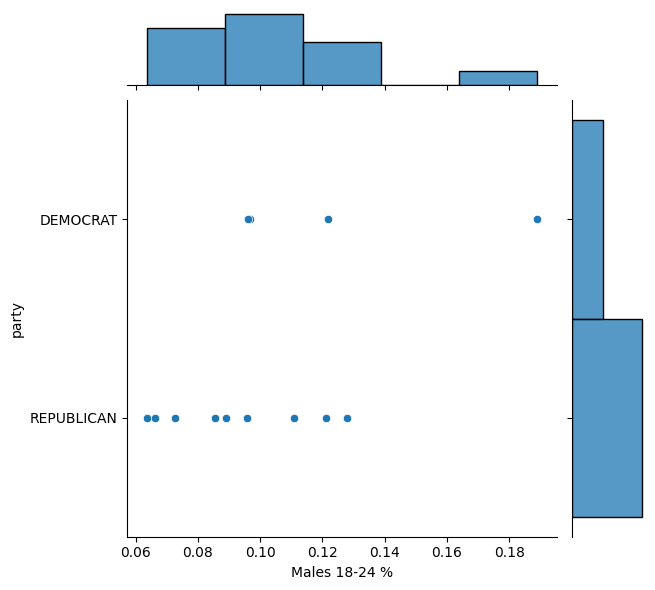

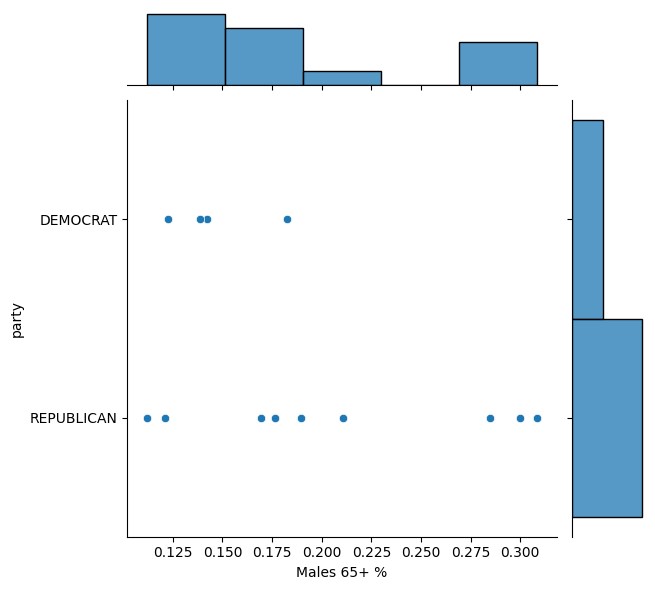

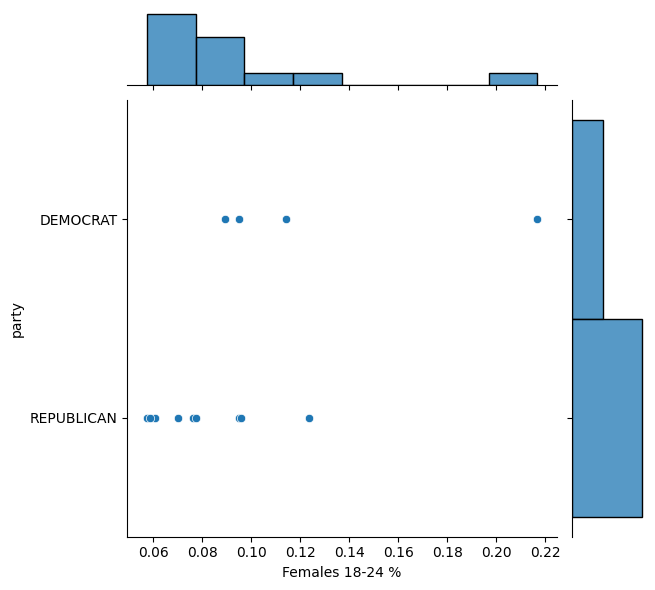

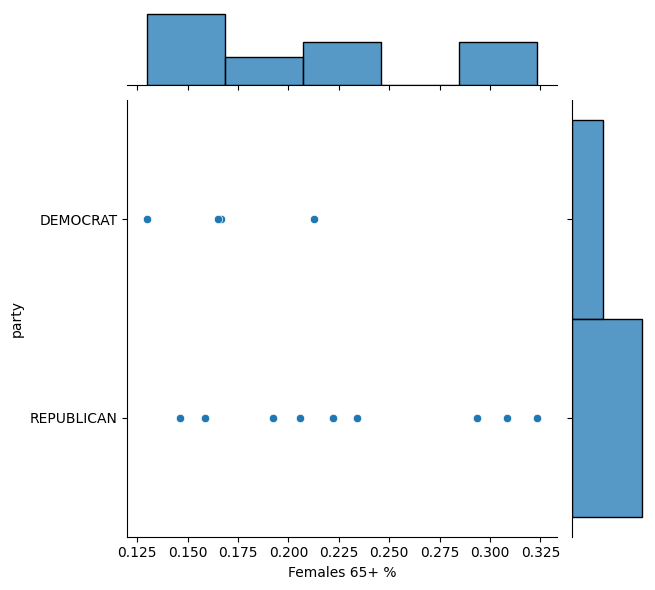

In [91]:
sns.jointplot(x=az_data['Males 18-24 %'],y=az_data['party'])
#sns.jointplot(x=az_data['Males 25-34 %'],y=az_data['party'])
#sns.jointplot(x=az_data['Males 35-44 %'],y=az_data['party'])
#sns.jointplot(x=az_data['Males 45-64 %'],y=az_data['party'])
sns.jointplot(x=az_data['Males 65+ %'],y=az_data['party'])

sns.jointplot(x=az_data['Females 18-24 %'],y=az_data['party'])
#sns.jointplot(x=az_data['Females 25-34 %'],y=az_data['party'])
#sns.jointplot(x=az_data['Females 35-44 %'],y=az_data['party'])
#sns.jointplot(x=az_data['Females 45-64 %'],y=az_data['party'])
sns.jointplot(x=az_data['Females 65+ %'],y=az_data['party'])

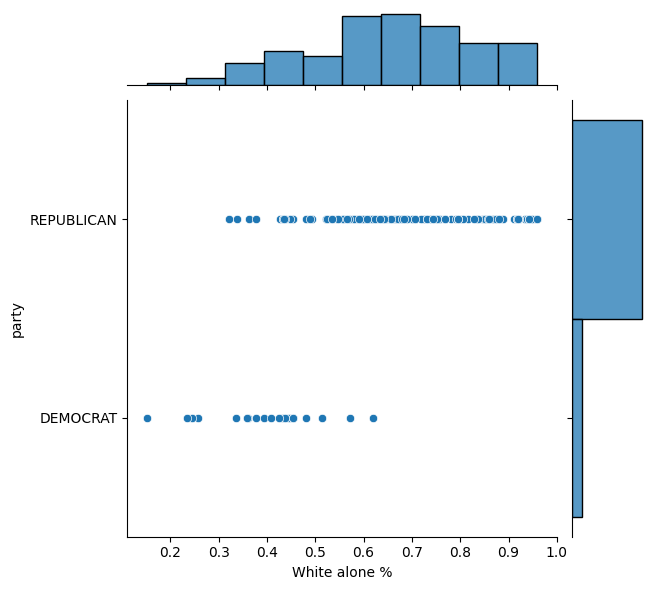

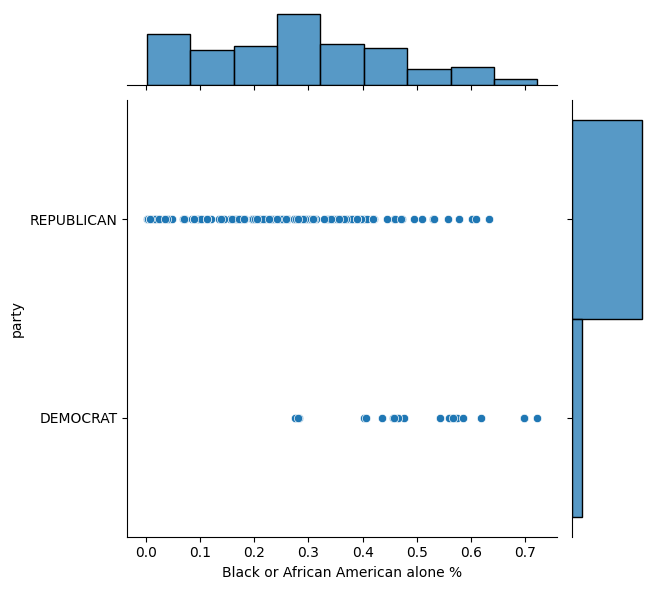

In [94]:
sns.jointplot(x=ga_data['White alone %'],y=ga_data['party'])
sns.jointplot(x=ga_data['Black or African American alone %'],y=ga_data['party'])


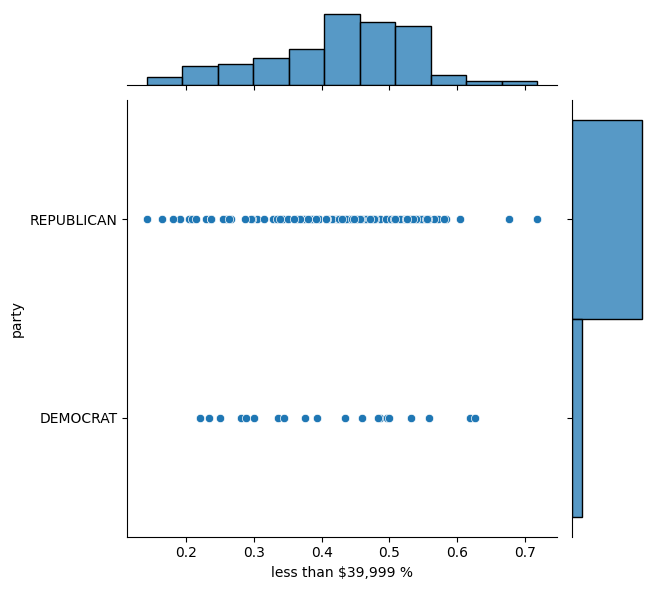

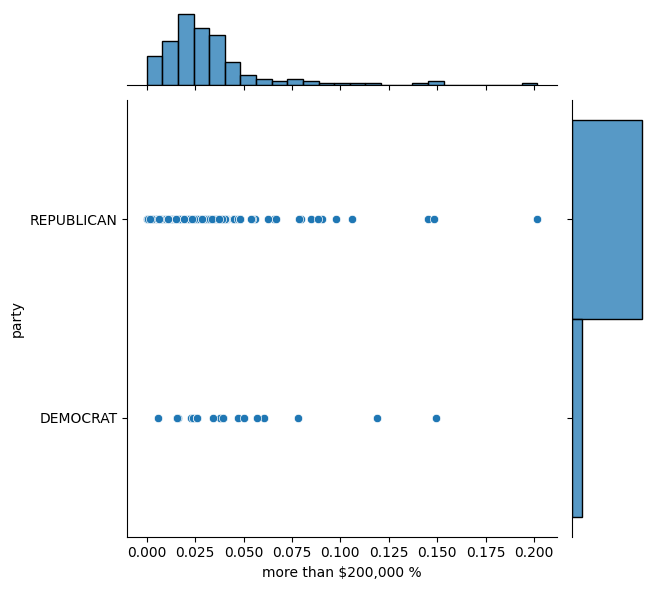

In [95]:
sns.jointplot(x=ga_data['less than $39,999 %'],y=ga_data['party'])
sns.jointplot(x=ga_data['more than $200,000 %'],y=ga_data['party'])

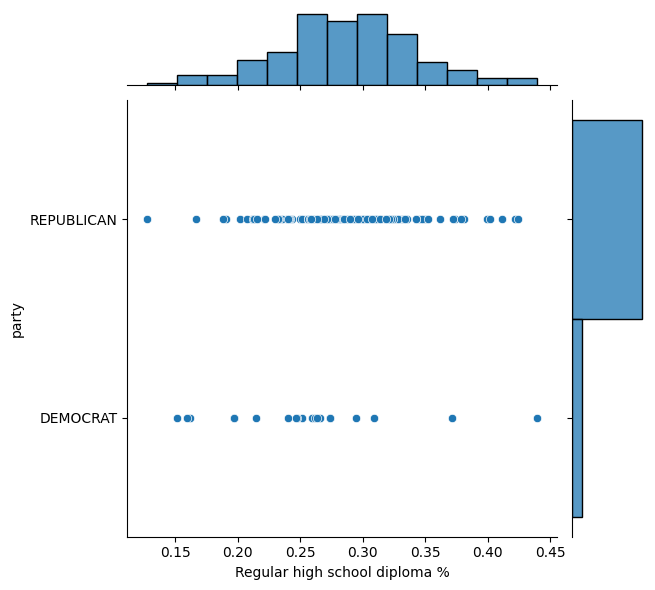

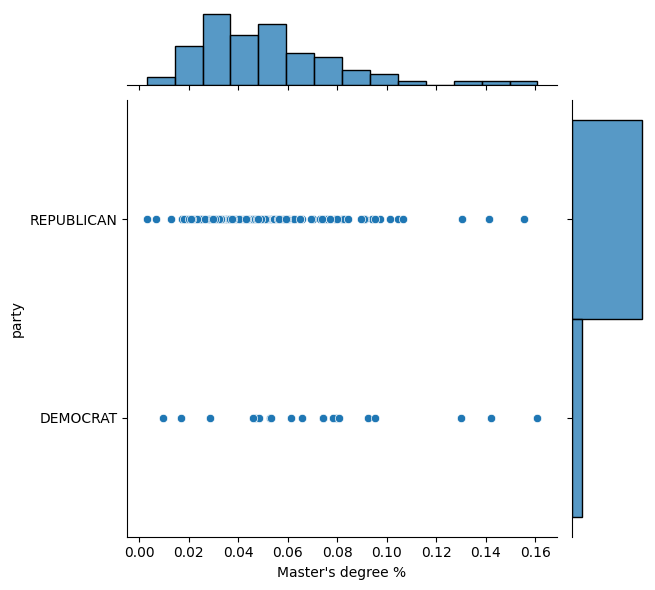

In [99]:
sns.jointplot(x=ga_data['Regular high school diploma %'],y=ga_data['party'])
sns.jointplot(x=ga_data["Master's degree %"],y=ga_data['party'])